# Cartopy tutorial: Transforming raster to raster

For the sake of brevity, the data required for this section has been pre-processed and is available in ``../../resources/HadCRUT4/fogg_mean_surface_temp.nc``

The notebook that generated this data is ``../../resources/HadCRUT4/create_fogg_mean_surface_temp.ipynb``, if you wish to explore further in your own time.

## The 1870s decadal mean surface temperature dataset

Fogg started his journey on Wednesday 2nd October 1872 at 8:45pm, with the goal to return 80 days later on Sunday 21st December 1872.

However, being a fashionable and highly refined gentleman of London Town, the meticulous Fogg would have been ruminating as to whether to pack his dapper, three-piece tweet gentlemans suit to keep him snugg and warm during his travels. Or indeed, perhaps something a tad more bohemian and carefree?

To help answer this question, we have sourced data from the [Met Office Hadley Centre](https://www.metoffice.gov.uk/climate-guide/science/science-behind-climate-change/hadley) that is representative of surface temperatures during this period.

So, let's first take a peek inside the NetCDF file that contains the pre-processed 1870's decadal mean surface temperatures for the three months of Phileas Foggs epic journey...

In [1]:
fname = '../../resources/HadCRUT/fogg_mean_surface_temp.nc'

In [2]:
!ncdump -h $fname

netcdf fogg_mean_surface_temp {
dimensions:
	time = 3 ;
	latitude = 36 ;
	longitude = 72 ;
	bnds = 2 ;
variables:
	double mean_surface_temperature(time, latitude, longitude) ;
		mean_surface_temperature:_FillValue = 1.e+20 ;
		mean_surface_temperature:long_name = "Mean Surface Temperature" ;
		mean_surface_temperature:units = "K" ;
		mean_surface_temperature:cell_methods = "decade: month_number: mean" ;
		mean_surface_temperature:coordinates = "decade month_number" ;
	float time(time) ;
		time:axis = "T" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-1-1 00:00:00" ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:calendar = "gregorian" ;
	float time_bnds(time, bnds) ;
	float latitude(latitude) ;
		latitude:axis = "Y" ;
		latitude:units = "degrees_north" ;
		latitude:standard_name = "latitude" ;
		latitude:long_name = "latitude" ;
		latitude:point_spacing = "even" ;
	float longitude(longitude) ;
		longitude:axis = "X" ;
		longitude:units = "degrees_ea

## Using netCDF4 and cartopy

We have a wide variety of tools at our disposal to read and extract this data from our NetCDF file. But let's go back to basics and use the Python netCDF4 package first...

In [3]:
import netCDF4 as nc

In [4]:
ds = nc.Dataset(fname)

In [5]:
print(sorted(ds.variables.keys()))

['decade', 'latitude', 'longitude', 'mean_surface_temperature', 'month_number', 'time', 'time_bnds']


Now we have a handle to the netCDF dataset, we can perform a cursory inspection of its metadata...

In [6]:
ds.variables['mean_surface_temperature'][:]

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]]],
  mask=[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True,

In [7]:
print(ds.variables['decade'][:])

[1870 1870 1870]


In [8]:
print(ds.variables['month_number'][:])

[10 11 12]


Okay, all seem's to be as we expected, so now cherry-pick out the data that we require in order to visualize the decadal mean surface temperature for **October** 1870s...

In [9]:
data = ds.variables['mean_surface_temperature'][:][0]
lats = ds.variables['latitude'][:]
lons = ds.variables['longitude'][:]

In [10]:
print('data.shape {}\nlats.shape {}\nlons.shape {}'.format(data.shape, lats.shape, lons.shape))

data.shape (36, 72)
lats.shape (36,)
lons.shape (72,)


Before we plot this data, we'll first need to massage the gridded 1-dimensional latitudes and longitudes so that they completely span our 2-dimensional dataset... 

In [11]:
import numpy as np

xx, yy = np.meshgrid(lons, lats)

Now, let's create a block plot and filled contour plot of the data projected onto a Plate Carree map... 

In [12]:
%matplotlib notebook

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


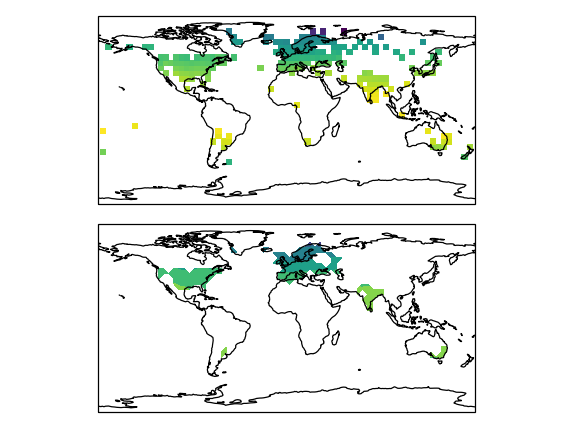

In [13]:
plt.figure()

pc = ccrs.PlateCarree()

ax1 = plt.subplot(211, projection=pc)
ax1.pcolormesh(xx, yy, data, transform=pc)
ax1.coastlines()
ax1.set_global()

ax2 = plt.subplot(212, projection=pc)
ax2.contourf(xx, yy, data, transform=pc)
ax2.coastlines()
ax2.set_global()

plt.tight_layout()
plt.show()

## Using iris and cartopy

Now let's try the above again, but using `iris` instead...

In [14]:
import iris

cube = iris.load_cube(fname)

/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'latitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'longitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2036: UserWarning: Gracefully fill

In [15]:
cube

<iris 'Cube' of Mean Surface Temperature / (K) (time: 3; latitude: 36; longitude: 72)>

In [16]:
print(cube.coord('decade'))

AuxCoord(masked_array(data=[1870, 1870, 1870],
             mask=[False, False, False],
       fill_value=-9223372036854775806), standard_name=None, units=Unit('1'), long_name='decade', var_name='decade')


In [17]:
print(cube.coord('month_number'))

AuxCoord(masked_array(data=[10, 11, 12],
             mask=[False, False, False],
       fill_value=-9223372036854775806), standard_name=None, units=Unit('1'), long_name='month_number', var_name='month_number')


In [18]:
print(cube.coord('time'))

DimCoord([1875-04-17 00:00:00, 1875-05-17 12:00:00, 1875-06-17 00:00:00], bounds=[[1870-10-16 12:00:00, 1879-10-16 12:00:00],
       [1870-11-16 00:00:00, 1879-11-16 00:00:00],
       [1870-12-16 12:00:00, 1879-12-16 12:00:00]], standard_name='time', calendar='gregorian', long_name='time', var_name='time')


<IPython.core.display.Javascript object>


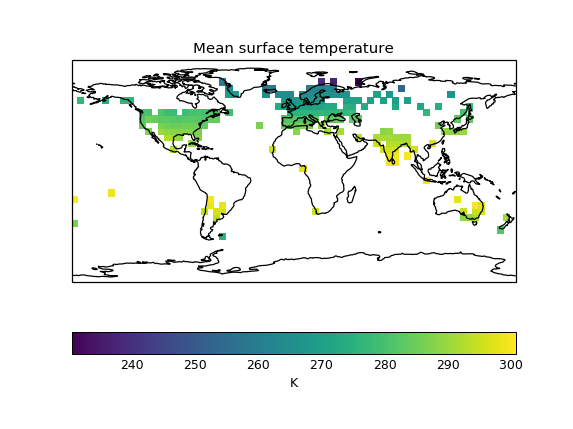

/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


In [19]:
import iris.quickplot as qplt

plt.figure()
qplt.pcolormesh(cube[0])
plt.gca().coastlines()
plt.show()

## Using xarray and cartopy

Now let's try the above again-again, but using `xarray`...

In [20]:
import xarray as xr

xds = xr.open_dataset(fname)

In [21]:
xds

<xarray.Dataset>
Dimensions:                   (bnds: 2, latitude: 36, longitude: 72, time: 3)
Coordinates:
  * time                      (time) datetime64[ns] 1875-04-17 ...
  * latitude                  (latitude) float32 -87.5 -82.5 -77.5 -72.5 ...
  * longitude                 (longitude) float32 -177.5 -172.5 -167.5 ...
    decade                    (time) int64 ...
    month_number              (time) int64 ...
Dimensions without coordinates: bnds
Data variables:
    mean_surface_temperature  (time, latitude, longitude) float64 ...
    time_bnds                 (time, bnds) float32 ...
Attributes:
    comment:           Decadal mean surface temperature for Oct-Dec 1870s
    history:           
    institution:       Climatic Research Unit, University of East Anglia/Met ...
    reference:         Jones, P. D., D. H. Lister, T. J. Osborn, C. Harpham, ...
    reference_period:  [1961 1990]
    source:            
    title:             CRUTEM4 temperature anomalies
    version:     

In [22]:
print(xds['decade'])

<xarray.DataArray 'decade' (time: 3)>
array([1870, 1870, 1870])
Coordinates:
  * time          (time) datetime64[ns] 1875-04-17 1875-05-17T12:00:00 ...
    decade        (time) int64 1870 1870 1870
    month_number  (time) int64 ...
Attributes:
    units:      1
    long_name:  decade


In [23]:
print(xds['month_number'])

<xarray.DataArray 'month_number' (time: 3)>
array([10, 11, 12])
Coordinates:
  * time          (time) datetime64[ns] 1875-04-17 1875-05-17T12:00:00 ...
    decade        (time) int64 1870 1870 1870
    month_number  (time) int64 10 11 12
Attributes:
    units:      1
    long_name:  month_number


In [24]:
print(xds['time'])

<xarray.DataArray 'time' (time: 3)>
array(['1875-04-17T00:00:00.000000000', '1875-05-17T12:00:00.000000000',
       '1875-06-17T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time          (time) datetime64[ns] 1875-04-17 1875-05-17T12:00:00 ...
    decade        (time) int64 1870 1870 1870
    month_number  (time) int64 10 11 12
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time
    long_name:      time


In [25]:
print(xds['time_bnds'])

<xarray.DataArray 'time_bnds' (time: 3, bnds: 2)>
array([[ 7593.5, 10880.5],
       [ 7624. , 10911. ],
       [ 7654.5, 10941.5]], dtype=float32)
Coordinates:
  * time          (time) datetime64[ns] 1875-04-17 1875-05-17T12:00:00 ...
    decade        (time) int64 1870 1870 1870
    month_number  (time) int64 10 11 12
Dimensions without coordinates: bnds


<IPython.core.display.Javascript object>


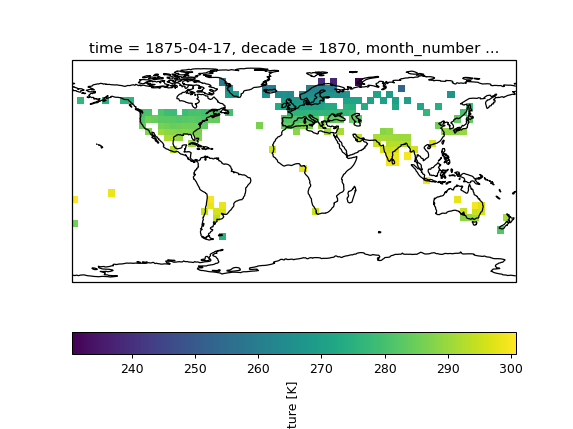

In [50]:
plt.figure()

ax = plt.axes(projection=ccrs.PlateCarree())
kwargs = dict(ax=ax, transform=pc, x='longitude', y='latitude', cbar_kwargs=dict(orientation='horizontal'))
xds['mean_surface_temperature'][0].plot.pcolormesh(**kwargs)
ax.coastlines()

plt.show()

As from [v0.10.1](http://xarray.pydata.org/en/stable/whats-new.html#id54) of `xarray`, the community can now leverage the benefit of data interoperability between `xarray` and `iris` thanks to the [xarray.DataArray.from_iris](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.from_iris.html) and [xarray.DataArray.to_iris](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.to_iris.html) methods.

In [27]:
xcube = xds['mean_surface_temperature'].to_iris()

In [28]:
xcube

<iris 'Cube' of Mean Surface Temperature / (K) (time: 3; latitude: 36; longitude: 72)>

<IPython.core.display.Javascript object>


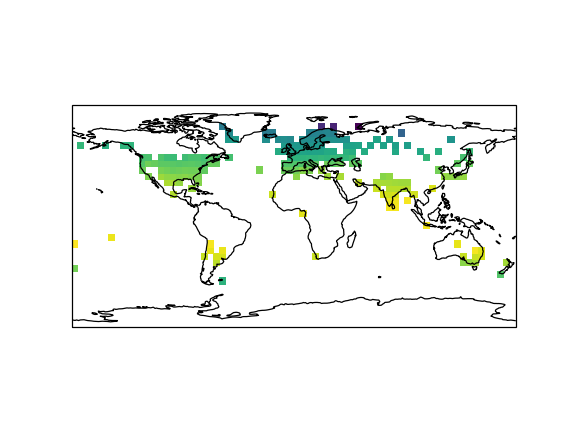

/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/bill/miniconda3/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


In [45]:
import iris.plot as iplt

plt.figure()

iplt.pcolormesh(xcube[0])
plt.gca().coastlines()

plt.show()

**Exercise X**: Plot the decadal mean surface temperatures for **October** 1870s using a Robinson projection and overlay the map with the route of Phileas Foggs journey. Use either a block plot or a contour plot to show the surface temperatures.

*Extension*: As above, but show all the months of Phileas Foggs journey i.e., **October, November** and **December**.